In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.linalg import inv
from tqdm import trange, tqdm

In [9]:
def nrmse(actual, predicted):
    return np.sqrt(np.mean(np.square(actual - predicted))) / (actual.max() - actual.min())

In [10]:
def read_dataset(filename):
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    with open(filename) as f:
        m = int(f.readline())
        n_train = int(f.readline())
        for i in range(n_train):
            line = f.readline().split()
            arr = [1]
            for j in range(m):
                arr.append(float(line[j]))
            x_train.append(arr)
            y_train.append(float(line[m]))
        n_test = int(f.readline())
        for i in range(n_test):
            line = f.readline().split()
            arr = [1]
            for j in range(m):
                arr.append(float(line[j]))
            x_test.append(arr)
            y_test.append(float(line[m]))
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    return x_train, y_train, x_test, y_test

In [11]:
def LSM(filename):
    x_train, y_train, x_test, y_test = read_dataset(filename)
    for i in range(1, x_train.shape[1]):
        v = x_train[:, i]
        if v.min() == v.max():
            x_train[:, i] = np.zeros(x_train.shape[0])
    best_rate = 100
    best_lambda = 0.001
    iter_to_loss = []
    for l in np.arange(0.001, 0.1, 0.001):
        # (X^T * X + lambda * I)^(-1) * X^T * Y
        w = inv(x_train.T @ x_train + l * np.identity(x_train.shape[1])) @ x_train.T @ y_train
        y_predicted = x_test @ w
        rate = nrmse(y_predicted, y_test)
        iter_to_loss.append(rate)
        if rate < best_rate:
            best_rate = rate
            best_lambda = l
    return best_rate, best_lambda, iter_to_loss

NRMSE for LSM: 0.16682993089815182 , best lambda:  0.006


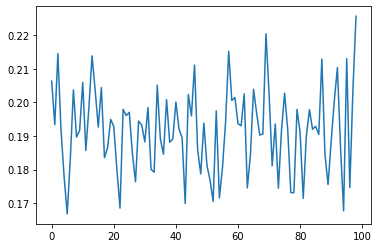

In [12]:
rate, best_lambda, iter_to_loss = LSM('2.txt')
plt.plot(iter_to_loss)
print("NRMSE for LSM:", rate, ", best lambda: ", best_lambda)

In [14]:
def min_max_normalization(dataset, m, n):
    min_max = [[0.0, 0.0] for i in range(m + 2)]
    for j in range(1, m + 1):
        minima = dataset[0][j]
        maxima = dataset[0][j]
        for i in range(n):
            minima = min(minima, dataset[i][j])
            maxima = max(maxima, dataset[i][j])
        min_max[j] = [minima, maxima]
        
    for row in dataset:
        for i in range(1, len(row)):
            if (min_max[i][1] - min_max[i][0] == 0):
                row[i] = 0
            else:
                row[i] = (row[i] - min_max[i][0]) / (min_max[i][1] - min_max[i][0])

In [55]:
def gradient_descent(l):
    iter_to_loss_train = []
    iter_to_loss_test = []

    x_train, y_train, x_test, y_test = read_dataset('2.txt')

    n = x_train.shape[0]
    m = x_train.shape[1] - 1

    n_test = x_test.shape[0]
    m_test = x_test.shape[1] - 1

    min_max_normalization(x_train, m, n)
    min_max_normalization(x_test, m_test, n_test)
    
    weights = [random.uniform(-1 / (2 * m), 1 / (2 * m)) for i in range(m + 1)]

    for epoch in trange(1, 2001):
        index = int(random.uniform(0, n + 1)) % n
        
        real_value = y_train[index]

        predicted_value = 0
        for i in range(m + 1):
            predicted_value += x_train[index][i] * weights[i]

        diff = predicted_value - real_value
        for i in range(m + 1):
            gradient = x_train[index][i] * diff + l * weights[i]
            weights[i] -= 1.0 / epoch * gradient

        iter_to_loss_train.append(nrmse(x_train @ weights, y_train))
        iter_to_loss_test.append(nrmse(x_test @ weights, y_test))

    return nrmse(x_test @ weights, y_test), iter_to_loss_train, iter_to_loss_test

In [56]:
best_lambda = None
best_rate = 100
best_iter_to_loss_train = None
best_iter_to_loss_test = None
for l in tqdm(np.arange(0.000, 0.2, 0.001)):
    rate, iter_to_loss_train, iter_to_loss_test = gradient_descent(l)
    if rate < best_rate:
        best_rate = rate
        best_iter_to_loss_train = iter_to_loss_train
        best_iter_to_loss_test = iter_to_loss_test
        best_lambda = l
    
print(f"NRMSE for gradient descent: {best_rate}, lambda: {best_lambda}", )

 78%|███████▊  | 1564/2000 [00:03<00:01, 342.20it/s]


 68%|██████▊   | 1363/2000 [00:03<00:02, 286.69it/s]


 60%|█████▉    | 1196/2000 [00:02<00:01, 543.71it/s]


  2%|▏         | 46/2000 [00:00<00:04, 458.01it/s]


  8%|▊         | 156/2000 [00:00<00:01, 1526.14it/s]


 58%|█████▊    | 1166/2000 [00:02<00:01, 433.58it/s]


 57%|█████▋    | 1137/2000 [00:02<00:01, 519.39it/s]


 16%|█▌        | 323/2000 [00:00<00:07, 221.45it/s]


 40%|███▉      | 796/2000 [00:01<00:04, 280.31it/s]


  0%|          | 0/2000 [00:00<?, ?it/s]


 44%|████▍     | 882/2000 [00:01<00:02, 434.11it/s]


 61%|██████    | 1222/2000 [00:01<00:00, 780.18it/s]


 15%|█▍        | 296/2000 [00:00<00:04, 401.11it/s]


 64%|██████▍   | 1286/2000 [00:01<00:01, 642.61it/s]


 62%|██████▏   | 1236/2000 [00:02<00:01, 567.21it/s]


 51%|█████▏    | 1026/2000 [00:01<00:01, 651.15it/s]


 79%|███████▉  | 1588/2000 [00:02<00:00, 774.79it/s]


 67%|██████▋   | 1345/2000 [00:01<00:00, 800.14it/s]


 71%|███████   | 1422/2000 [00:03<00:01, 432.38it/s]


 92%|█████████▏| 1847/2000 [00:04<00:00, 408.84it/s]


 72%|███████▎  | 1450/2000 [00:02<00:00, 635.04it/s]


 59%|█████▉    | 1184/2000 [00:01<00:01, 499.98it/s]


 53%|█████▎    | 1063/2000 [00:01<00:01, 606.88it/s]


 13%|█▎        | 251/2000 [00:00<00:03, 462.78it/s]


 72%|███████▏  | 1447/2000 [00:02<00:00, 598.07it/s]


 40%|███▉      | 793/2000 [00:01<00:02, 466.46it/s]


 55%|█████▍    | 1091/2000 [00:02<00:02, 390.02it/s]


 90%|█████████ | 1801/2000 [00:02<00:00, 637.01it/s]


 57%|█████▋    | 1139/2000 [00:01<00:01, 548.95it/s]


 59%|█████▉    | 1175/2000 [00:02<00:01, 592.48it/s]


 86%|████████▌ | 1719/2000 [00:03<00:00, 594.32it/s]


  7%|▋         | 138/2000 [00:00<00:06, 309.56it/s]


  9%|▉         | 177/2000 [00:00<00:03, 507.80it/s]


 14%|█▍        | 281/2000 [00:00<00:02, 611.43it/s]


 14%|█▍        | 281/2000 [00:00<00:01, 920.86it/s]


 46%|████▌     | 915/2000 [00:01<00:02, 472.21it/s]


 12%|█▏        | 244/2000 [00:00<00:07, 236.63it/s]


 73%|███████▎  | 1452/2000 [00:02<00:01, 545.31it/s]


 87%|████████▋ | 1740/2000 [00:02<00:00, 583.26it/s]


100%|██████████| 2000/2000 [00:02<00:00, 770.60it/s]


 68%|██████▊   | 1367/2000 [00:02<00:01, 536.28it/s]


 64%|██████▎   | 1273/2000 [00:03<00:03, 236.18it/s]


100%|██████████| 200/200 [14:04<00:00,  4.22s/it]

NRMSE for gradient descent: 0.14411275279400076, lambda: 0.049


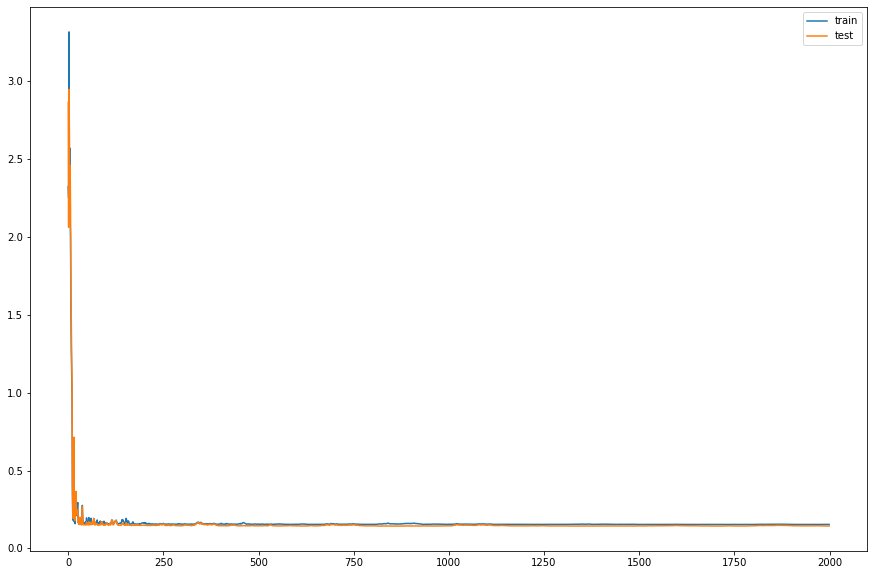

In [57]:
fig = plt.figure(figsize = (15, 10))
plt.plot(best_iter_to_loss_train, label="train")
plt.plot(best_iter_to_loss_test, label="test")
plt.legend()